# Practical Machine Learning Techniques

In this lecture/lab we will walk though solving a classification problem using machine learning/Neural Networks.

In machine learning, the typical workflow of solving a problem involves the following steps:

1. Identifying the problem statement: Classification/Regression/Clustering?
3. Dataset partitioning: Train/Test/Validation
2. Feature selection and pre-processing
4. Select performance metric based on the problem statement 
5. Selecting a base model to establish a baseline performance
6. Train/Validate on multiple models and report final test performance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Problem Statement: 

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets

dataset = datasets.fetch_kddcup99(as_frame=True, percent10=True)
print (dataset['DESCR'])

.. _kddcup99_dataset:

Kddcup 99 dataset
-----------------

The KDD Cup '99 dataset was created by processing the tcpdump portions
of the 1998 DARPA Intrusion Detection System (IDS) Evaluation dataset,
created by MIT Lincoln Lab [2]_. The artificial data (described on the `dataset's
homepage <https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html>`_) was
generated using a closed network and hand-injected attacks to produce a
large number of different types of attack with normal activity in the
background. As the initial goal was to produce a large training set for
supervised learning algorithms, there is a large proportion (80.1%) of
abnormal data which is unrealistic in real world, and inappropriate for
unsupervised anomaly detection which aims at detecting 'abnormal' data, i.e.:

* qualitatively different from normal data
* in large minority among the observations.

We thus transform the KDD Data set into two different data sets: SA and SF.

* SA is obtained by simply selecting all

In [ ]:
inputData = dataset['frame']
feature_names = dataset['feature_names']
print (feature_names)
inputData

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,b'tcp',b'http',b'SF',310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.0,0.01,0.0,0.0,b'normal.'
494017,0,b'tcp',b'http',b'SF',282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,b'normal.'
494018,0,b'tcp',b'http',b'SF',203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,b'normal.'
494019,0,b'tcp',b'http',b'SF',291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,b'normal.'


### Copy kddcup.csv and connect to your drive!

In [ ]:
#/content/drive/MyDrive/Neural Network Assignment and lab/kddcup.csv
inputData = pd.read_csv('/content/drive/MyDrive/Neural Network Assignment and lab/kddcup.csv', names=feature_names + ["labels"]).drop_duplicates()
inputData

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [ ]:
inputData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074992 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   duration                     1074992 non-null  int64  
 1   protocol_type                1074992 non-null  object 
 2   service                      1074992 non-null  object 
 3   flag                         1074992 non-null  object 
 4   src_bytes                    1074992 non-null  int64  
 5   dst_bytes                    1074992 non-null  int64  
 6   land                         1074992 non-null  int64  
 7   wrong_fragment               1074992 non-null  int64  
 8   urgent                       1074992 non-null  int64  
 9   hot                          1074992 non-null  int64  
 10  num_failed_logins            1074992 non-null  int64  
 11  logged_in                    1074992 non-null  int64  
 12  num_compromised              1074992 non-n

In [ ]:
# Distribution of output labels
inputData['labels'].value_counts()

normal.             812814
neptune.            242149
satan.                5019
ipsweep.              3723
portsweep.            3564
smurf.                3007
nmap.                 1554
back.                  968
teardrop.              918
warezclient.           893
pod.                   206
guess_passwd.           53
buffer_overflow.        30
warezmaster.            20
land.                   19
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: labels, dtype: int64

In [ ]:
# Subselect only normal and one attack type!
inputData = inputData[inputData["labels"].apply(lambda x: x in ["normal.", "satan."])]
inputData["labels"].value_counts()

normal.    812814
satan.       5019
Name: labels, dtype: int64

In [ ]:
# Change labels
normalIndex = inputData['labels']=='normal.'

# Add new binary label column
inputData['y'] = 1
inputData.loc[normalIndex, 'y'] = 0
print(inputData['y'].value_counts())
print(inputData['y'].value_counts(normalize=True))

0    812814
1      5019
Name: y, dtype: int64
0    0.993863
1    0.006137
Name: y, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
normalIndex

0          True
1          True
2          True
3          True
4          True
           ... 
4898426    True
4898427    True
4898428    True
4898429    True
4898430    True
Name: labels, Length: 817833, dtype: bool

##2. Dataset Partitioning

Keep same distriution as whole dataset

In [ ]:
from sklearn.model_selection import train_test_split

featuresX = inputData[feature_names]
outputY = inputData['y']

xTrain, xTest, yTrain, yTest = train_test_split(featuresX, outputY, test_size=0.25, random_state=13, shuffle=True, stratify=outputY)
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size=0.25, random_state=13, shuffle=True, stratify=yTrain)

#Final test distribution
print (yTest.value_counts(normalize=False))
print (yTest.value_counts(normalize=True))

0    203204
1      1255
Name: y, dtype: int64
0    0.993862
1    0.006138
Name: y, dtype: float64


##3. Feature Selection and Pre-processing

In [ ]:
xTrain

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
831501,0,tcp,http,SF,347,292,0,0,0,0,...,4,255,1.00,0.00,0.25,0.03,0.0,0.00,0.00,0.00
743011,1,tcp,smtp,SF,742,333,0,0,0,0,...,105,165,0.64,0.04,0.01,0.01,0.0,0.00,0.02,0.05
4819446,5,tcp,smtp,SF,1282,330,0,0,0,0,...,77,55,0.71,0.05,0.01,0.00,0.0,0.00,0.00,0.00
42659,0,tcp,http,SF,292,2517,0,0,0,0,...,7,255,1.00,0.00,0.14,0.04,0.0,0.00,0.00,0.00
892062,1,tcp,smtp,SF,1146,329,0,0,0,0,...,13,194,0.85,0.23,0.08,0.02,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4472121,6541,udp,other,SF,145,105,0,0,0,0,...,255,2,0.01,0.61,0.96,0.00,0.0,0.00,0.00,0.00
71448,0,tcp,http,SF,234,1658,0,0,0,0,...,35,255,1.00,0.00,0.03,0.01,0.0,0.00,0.00,0.00
286204,0,tcp,http,SF,225,26969,0,0,0,0,...,17,255,1.00,0.00,0.06,0.01,0.0,0.00,0.00,0.00
168610,0,tcp,http,SF,302,715,0,0,0,0,...,179,255,1.00,0.00,0.01,0.04,0.0,0.01,0.00,0.00


In [ ]:
xTrain.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Gradients are directly proportional to value of x. Hence, need to transform dataset to account for different scales in data. 

In [ ]:
categoricalColumns = ['protocol_type', 'service', 'flag']
numericalColumns = list(set(feature_names) - set(categoricalColumns))

# https://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder

In [ ]:
xTrain[numericalColumns].max()

num_outbound_cmds                     0.0
dst_host_diff_srv_rate                1.0
dst_host_same_src_port_rate           1.0
num_access_files                      9.0
su_attempted                          2.0
num_file_creations                   41.0
dst_host_srv_rerror_rate              1.0
num_failed_logins                     4.0
srv_count                           511.0
is_host_login                         1.0
duration                          58329.0
num_shells                            2.0
same_srv_rate                         1.0
serror_rate                           1.0
dst_host_rerror_rate                  1.0
src_bytes                      24418776.0
num_compromised                    7479.0
land                                  1.0
wrong_fragment                        0.0
dst_host_srv_diff_host_rate           1.0
hot                                  44.0
root_shell                            1.0
dst_host_count                      255.0
srv_rerror_rate                   

Scaling numerical data!



In [ ]:
x = np.array([[1, 5],[2, 6],[3, 7],[4, 8]])
print (x)
scaler = MinMaxScaler()
scaler.fit_transform(x)

[[1 5]
 [2 6]
 [3 7]
 [4 8]]


array([[0.        , 0.        ],
       [0.33333333, 0.33333333],
       [0.66666667, 0.66666667],
       [1.        , 1.        ]])

Transforming categorical data

In [ ]:
x = np.array([['A', 'Hello'],['A', 'Bye'],['B', 'Hello'],['B', 'Bye?']])
print (x)
OrdinalEncoder().fit_transform(x)

[['A' 'Hello']
 ['A' 'Bye']
 ['B' 'Hello']
 ['B' 'Bye?']]


array([[0., 2.],
       [0., 0.],
       [1., 2.],
       [1., 1.]])

In [ ]:
#x = np.array([['A', 'Hello'],['A', 'Bye'],['B', 'Hello'],['B', 'Bye?']])
x = np.array([['A'],['C',],['B'],['B'], ["Hello"]])

print (x)
OneHotEncoder().fit_transform(x).toarray()

[['A']
 ['C']
 ['B']
 ['B']
 ['Hello']]


array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
from scipy.sparse import issparse

def preprocessFeatures(X, numericalColumns, categoricalColumns, bFitScaler=False, numericalScaler=MinMaxScaler(), categoricalScaler=OneHotEncoder()):
  ''' Return pre-processed input X! and scalers!
  '''
  
  # Cast as numerical data
  for c in numericalColumns:
    X[c] = X[c].astype(np.float32)
  
  # Cast as string
  for c in categoricalColumns:
    X[c] = X[c].astype(str)
  
  if bFitScaler:
    # Need to fit scaler!
    numericalScaler.fit(X[numericalColumns])
    categoricalScaler.fit(X[categoricalColumns])

  print (f"Shape of X: {X.shape}")

  X_numerical = numericalScaler.transform(X[numericalColumns])
  print (f"Shape for numerical X: {X_numerical.shape}")

  X_categorical = categoricalScaler.transform(X[categoricalColumns])
  if issparse(X_categorical):
    X_categorical = X_categorical.toarray()
  print (f"Shape for categorical X: {X_categorical.shape}")

  X_transformed = np.hstack((X_numerical, X_categorical))
  print (f"Shape for final transformed X: {X_transformed.shape}") 
  
  return X_transformed, numericalScaler, categoricalScaler

# Fit scaler on training data!
xTrain_transformed, numScaler, catScaler = preprocessFeatures(
    xTrain, numericalColumns, categoricalColumns, 
    bFitScaler=True, 
    numericalScaler=MinMaxScaler(), 
    categoricalScaler=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), #OneHotEncoder(handle_unknown='ignore'),
    )
xTrain_transformed

Shape of X: (460030, 41)
Shape for numerical X: (460030, 38)
Shape for categorical X: (460030, 3)
Shape for final transformed X: (460030, 41)


array([[0.00000000e+00, 0.00000000e+00, 2.50000000e-01, ...,
        1.00000000e+00, 2.20000000e+01, 8.00000000e+00],
       [0.00000000e+00, 3.99999991e-02, 9.99999978e-03, ...,
        1.00000000e+00, 4.80000000e+01, 8.00000000e+00],
       [0.00000000e+00, 5.00000007e-02, 9.99999978e-03, ...,
        1.00000000e+00, 4.80000000e+01, 8.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 5.99999987e-02, ...,
        1.00000000e+00, 2.20000000e+01, 8.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.99999978e-03, ...,
        1.00000000e+00, 2.20000000e+01, 8.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 2.20000000e+01, 8.00000000e+00]])

In [ ]:
#Transform validation and test data!
print ("Validation Set")
xVal_transformed, _, _ = preprocessFeatures(xVal, numericalColumns, categoricalColumns, bFitScaler=False, numericalScaler=numScaler, categoricalScaler=catScaler)

print()
print ("Test Set")
xTest_transformed, _, _ = preprocessFeatures(xTest, numericalColumns, categoricalColumns, bFitScaler=False, numericalScaler=numScaler, categoricalScaler=catScaler)

Validation Set
Shape of X: (153344, 41)
Shape for numerical X: (153344, 38)
Shape for categorical X: (153344, 3)
Shape for final transformed X: (153344, 41)

Test Set
Shape of X: (204459, 41)
Shape for numerical X: (204459, 38)
Shape for categorical X: (204459, 3)
Shape for final transformed X: (204459, 41)


## 4. Establish baseline: Logistic Regression and Pick performance metric



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

# Define a model
model = LogisticRegression(random_state=13)

# Fit data to the model
model.fit(xTrain_transformed, yTrain)

# Make prediction
yTrain_predict = model.predict(xTrain_transformed)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### How do we evaluate model performance? [Confusion Matrix]

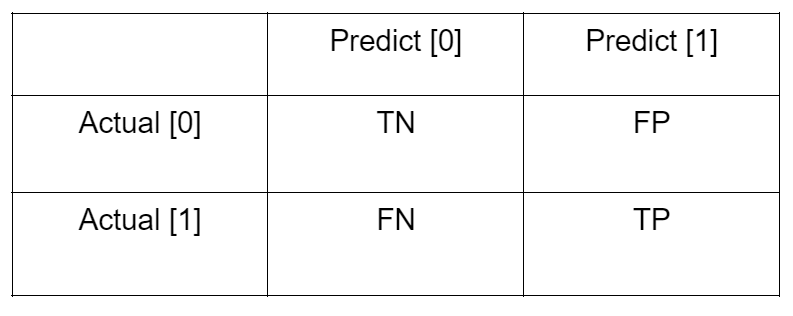

**Accuracy**: 
> = (TP + TN) / (TP + TN + FP + FN)



**Precision**: *Positive Prediction Rate*
> = TP / (TP + FP)       


**Recall**: *True Positive Rate*
> = TP / (TP + FN)  


**F1 score**: *Harmonic mean of Precision & Recall*
> = 2.precision.recall / (precision + recall)  

In [ ]:
def getEvalMetrics(yTrue, yPred):
  conf = metrics.confusion_matrix(yTrue, yPred)
  acc = metrics.accuracy_score(yTrue, yPred)
  f1 = metrics.f1_score(yTrue, yPred)
  print ("Confusion Matrix")
  print (conf)
  print()
  scores = {
      'accuracy': acc,
      'f1_score': f1,
  }
  for m, val in scores.items():
    print (f"{m}:\t{val:.4f}")
  return scores

getEvalMetrics(yTrain, yTrain_predict)

Confusion Matrix
[[457156     51]
 [   392   2431]]

accuracy:	0.9990
f1_score:	0.9165


{'accuracy': 0.9990370193248267, 'f1_score': 0.9164938737040529}

In [ ]:
getEvalMetrics(yTrain, np.zeros(yTrain.shape[0]))

Confusion Matrix
[[457207      0]
 [  2823      0]]

accuracy:	0.9939
f1_score:	0.0000


{'accuracy': 0.9938634436884551, 'f1_score': 0.0}

In [ ]:
# Test performance on other partitions

print ("Performance on validation set:")
yVal_predict = model.predict(xVal_transformed)
getEvalMetrics(yVal, yVal_predict)

print ()
print ("Performance on test set:")
yTest_predict = model.predict(xTest_transformed)
getEvalMetrics(yTest, yTest_predict)

Performance on validation set:
Confusion Matrix
[[152377     26]
 [   144    797]]

accuracy:	0.9989
f1_score:	0.9036

Performance on test set:
Confusion Matrix
[[203184     20]
 [   171   1084]]

accuracy:	0.9991
f1_score:	0.9190


{'accuracy': 0.9990658273785943, 'f1_score': 0.9190334887664265}

## Neural Networks

In [ ]:
from keras.models import Sequential     # Feed forward
from keras.layers import Dense          # Logistic Unit, All inputs are connected to
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Define a model
def getNNModel(inputDim):
  model = Sequential()
  model.add(Dense(8, input_dim=inputDim, activation='relu', name="Hidden1"))
  model.add(Dense(4, activation='relu', name="Hidden2"))
  model.add(Dense(1, activation='sigmoid', name="Output"))
  return model
nnModel = getNNModel(xTrain.shape[1])
nnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 8)                 336       
                                                                 
 Hidden2 (Dense)             (None, 4)                 36        
                                                                 
 Output (Dense)              (None, 1)                 5         
                                                                 
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile a model
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
nnModel.compile(loss='binary_crossentropy', optimizer=opt)

### Gradient Descent 

**Batch Gradient Descent**: Use all *m* examples in each iteration/epoch 
> For each iteration:
>> Θ = Θ - α∑ₘ(h(x) - y)x 



**Stochastic Gradient Descent**: Use *1* example in each iteration/epoch 
> For each iteration:
>> Randomly shuffle all data
>> For each example: 1 --> m
>>> Θ = Θ - α(h(x) - y)x 

**Mini-Batch Gradient Descent**: Use *b* examples in each iteration/epoch 
> Assume: b=10, m=1000
> For each iteration:
>> Randomly shuffle all data
>> For each batch β: 1 --> m/b = 100
>>> Θ = Θ - α∑ᵦ(h(x) - y)x 


In [ ]:
# Fit a model
history=nnModel.fit(xTrain_transformed, yTrain, validation_split=0.2, epochs=10, batch_size=100)

Epoch 1/10
3681/3681 [==============================] - 8s 2ms/step - loss: 0.0500 - val_loss: 0.0308
Epoch 2/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0235 - val_loss: 0.0180
Epoch 3/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0139 - val_loss: 0.0143
Epoch 4/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0117 - val_loss: 0.0164
Epoch 5/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0109 - val_loss: 0.0115
Epoch 6/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0105 - val_loss: 0.0100
Epoch 7/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0102 - val_loss: 0.0098
Epoch 8/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0098 - val_loss: 0.0100
Epoch 9/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0096 - val_loss: 0.0101
Epoch 10/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.009

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


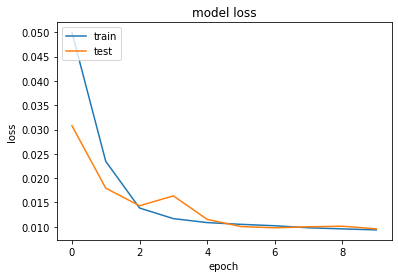

In [ ]:
#plotting loss response for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# NN output are direct sigmoids.. i.e. the probabilities
nnModel.predict(xTrain_transformed)

array([[1.0644613e-05],
       [1.4513731e-04],
       [1.3682246e-04],
       ...,
       [1.0379791e-05],
       [1.1335001e-05],
       [1.1260335e-05]], dtype=float32)

In [ ]:
print ("Performance on validation set:")
yVal_predict_prob = nnModel.predict(xVal_transformed)
yVal_predict = np.zeros(yVal_predict_prob.shape)
yVal_predict[yVal_predict_prob > 0.5] = 1
getEvalMetrics(yVal, yVal_predict)

print ()
print ("Performance on test set:")
yTest_predict_prob = nnModel.predict(xTest_transformed)
yTest_predict = np.zeros(yTest_predict_prob.shape)
yTest_predict[yTest_predict_prob > 0.5] = 1
getEvalMetrics(yTest, yTest_predict)


Performance on validation set:
Confusion Matrix
[[152399      4]
 [   375    566]]

accuracy:	0.9975
f1_score:	0.7492

Performance on test set:
Confusion Matrix
[[203201      3]
 [   489    766]]

accuracy:	0.9976
f1_score:	0.7569


{'accuracy': 0.9975936495825569, 'f1_score': 0.7569169960474308}

## 5. Lab 3

5.1. Rewrite your own neural network model to outperform Results from Logistic  regression on the validation set. [4 points]. 

5.2. Plot per-epoch loss on training & validation set. Hint: keras History, Callback. [2 points]

5.3. Plot per-epoch losses on training & validation set with different batch sizes for your model [1, 10, 100, 1000]. Discuss on how different batch sizes affects the convergence of your Neural Network. [2 points]

5.4. Report final performance on the test set. [2 points]. **[Extrapoints for f1 > 0.98]**

In [ ]:
#5.1. Rewrite your own neural network model to outperform Results from Logistic regression on the validation set. [4 points].

def getNNModel(inputDim):
  model = Sequential()
  model.add(Dense(32, input_dim=inputDim, activation='relu', name="Hidden1"))
  model.add(Dense(16, input_dim=inputDim, activation='relu', name="Hidden2"))
  model.add(Dense(8, input_dim=inputDim, activation='relu', name="Hidden3"))
  model.add(Dense(4, activation='relu', name="Hidden4"))
  model.add(Dense(1, activation='sigmoid', name="Output"))
  return model
nnModel = getNNModel(xTrain.shape[1])
nnModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 32)                1344      
                                                                 
 Hidden2 (Dense)             (None, 16)                528       
                                                                 
 Hidden3 (Dense)             (None, 8)                 136       
                                                                 
 Hidden4 (Dense)             (None, 4)                 36        
                                                                 
 Output (Dense)              (None, 1)                 5         
                                                                 
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile a model
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
nnModel.compile(loss='binary_crossentropy', optimizer=opt)

In [ ]:
# Fit a model
history= nnModel.fit(xTrain_transformed, yTrain,validation_split=0.2,epochs=10, batch_size=100)

Epoch 1/10
3681/3681 [==============================] - 8s 2ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 2/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 3/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 4/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0022 - val_loss: 0.0028
Epoch 5/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 6/10
3681/3681 [==============================] - 8s 2ms/step - loss: 0.0024 - val_loss: 0.0035
Epoch 7/10
3681/3681 [==============================] - 8s 2ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 8/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 9/10
3681/3681 [==============================] - 8s 2ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 10/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.002

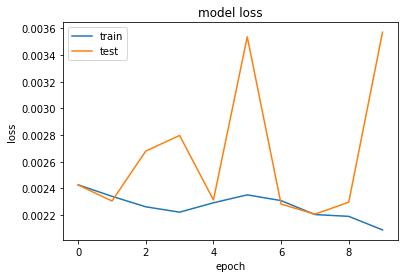

In [ ]:
#5.2. Plot per-epoch loss on training & validation set. Hint: keras History, Callback. [2 points]
#plotting loss response for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print ("Performance on validation set:")
yVal_predict_prob = nnModel.predict(xVal_transformed)
yVal_predict = np.zeros(yVal_predict_prob.shape)
yVal_predict[yVal_predict_prob > 0.5] = 1
getEvalMetrics(yVal, yVal_predict)

print ()
print ("Performance on test set:")
yTest_predict_prob = nnModel.predict(xTest_transformed)
yTest_predict = np.zeros(yTest_predict_prob.shape)
yTest_predict[yTest_predict_prob > 0.5] = 1
getEvalMetrics(yTest, yTest_predict)

Performance on validation set:
Confusion Matrix
[[152273    130]
 [    48    893]]

accuracy:	0.9988
f1_score:	0.9094

Performance on test set:
Confusion Matrix
[[203063    141]
 [    65   1190]]

accuracy:	0.9990
f1_score:	0.9203


{'accuracy': 0.998992463036599, 'f1_score': 0.9203402938901779}

5.3. Plot per-epoch losses on training & validation set with different batch sizes for your model [1, 10, 100, 1000]. 
Discuss on how different batch sizes affects the convergence of your Neural Network. [2 points]

.>> With increase in batch size time required for convergence reduces but it leads to poor generalization.

In [ ]:
# for batch size 1
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
nnModel.compile(loss='binary_crossentropy', optimizer=opt)
# Fit a model
history1= nnModel.fit(xTrain_transformed, yTrain, validation_split=0.2, epochs=10, batch_size=1)

Epoch 1/10
368024/368024 [==============================] - 658s 2ms/step - loss: 0.0695 - val_loss: 0.0388
Epoch 2/10
368024/368024 [==============================] - 601s 2ms/step - loss: 0.0372 - val_loss: 0.0389
Epoch 3/10
368024/368024 [==============================] - 663s 2ms/step - loss: 0.0372 - val_loss: 0.0389
Epoch 4/10
368024/368024 [==============================] - 648s 2ms/step - loss: 0.0371 - val_loss: 0.0391
Epoch 5/10
368024/368024 [==============================] - 647s 2ms/step - loss: 0.0372 - val_loss: 0.0388
Epoch 6/10
368024/368024 [==============================] - 646s 2ms/step - loss: 0.0372 - val_loss: 0.0389
Epoch 7/10
368024/368024 [==============================] - 645s 2ms/step - loss: 0.0372 - val_loss: 0.0388
Epoch 8/10
368024/368024 [==============================] - 620s 2ms/step - loss: 0.0371 - val_loss: 0.0389
Epoch 9/10
368024/368024 [==============================] - 661s 2ms/step - loss: 0.0371 - val_loss: 0.0388
Epoch 10/10
368024/368024 [=

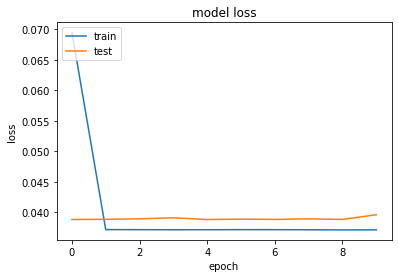

In [ ]:
#5.2. Plot per-epoch loss on training & validation set. Hint: keras History, Callback. [2 points]
#plotting loss response for each epoch
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# for batch size 10

# Fit a model
history2= nnModel.fit(xTrain_transformed, yTrain, validation_split=0.2, epochs=10, batch_size=10)





Epoch 1/10
36803/36803 [==============================] - 69s 2ms/step - loss: 0.0111 - val_loss: 0.0087
Epoch 2/10
36803/36803 [==============================] - 79s 2ms/step - loss: 0.0091 - val_loss: 0.0162
Epoch 3/10
36803/36803 [==============================] - 69s 2ms/step - loss: 0.0086 - val_loss: 0.0091
Epoch 4/10
36803/36803 [==============================] - 69s 2ms/step - loss: 0.0083 - val_loss: 0.0078
Epoch 5/10
36803/36803 [==============================] - 69s 2ms/step - loss: 0.0079 - val_loss: 0.0072
Epoch 6/10
36803/36803 [==============================] - 80s 2ms/step - loss: 0.0076 - val_loss: 0.0086
Epoch 7/10
36803/36803 [==============================] - 72s 2ms/step - loss: 0.0074 - val_loss: 0.0067
Epoch 8/10
36803/36803 [==============================] - 70s 2ms/step - loss: 0.0068 - val_loss: 0.0055
Epoch 9/10
36803/36803 [==============================] - 72s 2ms/step - loss: 0.0063 - val_loss: 0.0067
Epoch 10/10
36803/36803 [==============================

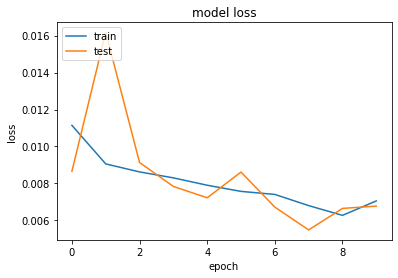

In [ ]:
#plotting loss response for each epoch
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print ("Performance on validation set:")
yVal_predict_prob = nnModel.predict(xVal_transformed)
yVal_predict = np.zeros(yVal_predict_prob.shape)
yVal_predict[yVal_predict_prob > 0.5] = 1
getEvalMetrics(yVal, yVal_predict)

print ()
print ("Performance on test set:")
yTest_predict_prob = nnModel.predict(xTest_transformed)
yTest_predict = np.zeros(yTest_predict_prob.shape)
yTest_predict[yTest_predict_prob > 0.5] = 1
getEvalMetrics(yTest, yTest_predict)

Performance on validation set:
Confusion Matrix
[[152397      6]
 [   225    716]]

accuracy:	0.9985
f1_score:	0.8611

Performance on test set:
Confusion Matrix
[[203197      7]
 [   271    984]]

accuracy:	0.9986
f1_score:	0.8762


{'accuracy': 0.998640314195022, 'f1_score': 0.8762243989314337}

Epoch 1/10
3681/3681 [==============================] - 8s 2ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 2/10
3681/3681 [==============================] - 8s 2ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 3/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 4/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 5/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 6/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 7/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 8/10
3681/3681 [==============================] - 8s 2ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 9/10
3681/3681 [==============================] - 8s 2ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 10/10
3681/3681 [==============================] - 7s 2ms/step - loss: 0.002

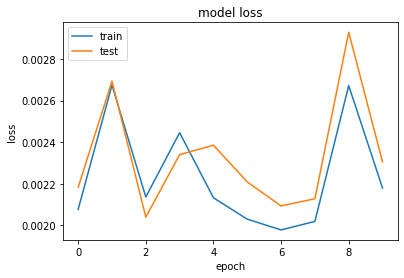

In [ ]:
# for batch size 100

# Fit a model
history3= nnModel.fit(xTrain_transformed, yTrain, validation_split=0.2, epochs=10, batch_size=100)

#plotting loss response for each epoch
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# for batch size 1000

# Fit a model
history4= nnModel.fit(xTrain_transformed, yTrain, validation_split=0.2, epochs=10, batch_size=1000)

Epoch 1/10
369/369 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 2/10
369/369 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3/10
369/369 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 4/10
369/369 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 5/10
369/369 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 6/10
369/369 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 7/10
369/369 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 8/10
369/369 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 9/10
369/369 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 10/10
369/369 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0016

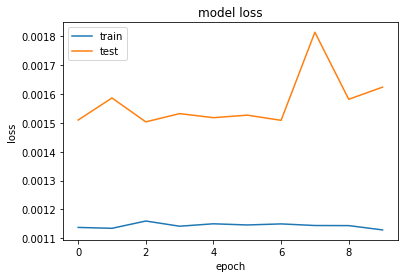

In [ ]:
#plotting loss response for each epoch
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print ("Performance on validation set:")
yVal_predict_prob = nnModel.predict(xVal_transformed)
yVal_predict = np.zeros(yVal_predict_prob.shape)
yVal_predict[yVal_predict_prob > 0.5] = 1
getEvalMetrics(yVal, yVal_predict)

print ()
print ("Performance on test set:")
yTest_predict_prob = nnModel.predict(xTest_transformed)
yTest_predict = np.zeros(yTest_predict_prob.shape)
yTest_predict[yTest_predict_prob > 0.5] = 1
getEvalMetrics(yTest, yTest_predict)

Performance on validation set:
Confusion Matrix
[[152393     10]
 [    37    904]]

accuracy:	0.9997
f1_score:	0.9747

Performance on test set:
Confusion Matrix
[[203197      7]
 [    60   1195]]

accuracy:	0.9997
f1_score:	0.9727


{'accuracy': 0.9996723059390881, 'f1_score': 0.9727309727309728}